In [24]:
from google.colab import files
uploaded = files.upload()

Saving houseprice.csv to houseprice (1).csv


In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV

In [26]:
df = pd.read_csv('houseprice.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
df.shape

(1460, 81)

In [28]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [30]:
# finding the columns with the missing values and there percentage missing
df.isnull().sum()
miss_val = df.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

# Add a new column to the dataframe and fill it with the percentage missing value

miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x :'{:2f}'.format(float(x)/df.shape[0] * 100))
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

,MissvalCount,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In [31]:
# drop the columns with highest missing values
df = df.drop(['MiscFeature','PoolQC','Alley','Fence','FireplaceQu'], axis=1)

In [32]:
# drop rows with any missing values
df.dropna(inplace=True)

In [33]:
df.shape

(1094, 76)

<ipython-input-35-17589b9d4d20>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.SalePrice)


<Axes: xlabel='SalePrice', ylabel='Density'>

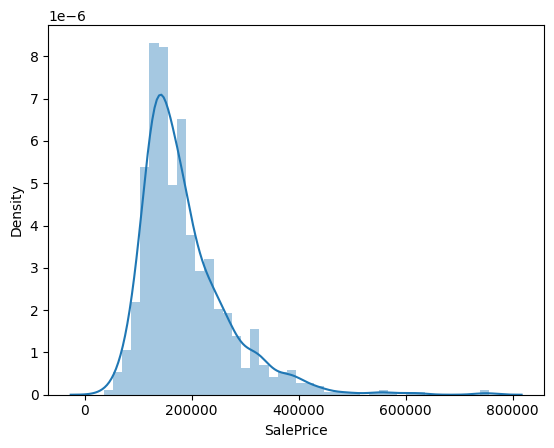

In [35]:
import seaborn as sns
sns.distplot(df.SalePrice)

<ipython-input-37-1e062d4ada5d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.SalePrice)


<Axes: xlabel='SalePrice', ylabel='Density'>

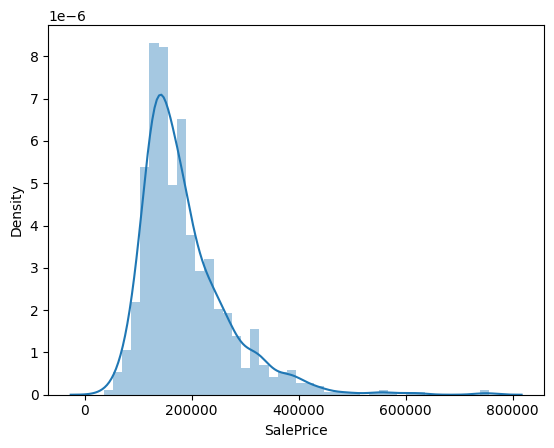

In [37]:
sns.distplot(df.SalePrice)

In [38]:
import numpy as np

df['LogOfPrice'] = np.log(df.SalePrice)
df.drop(['SalePrice'], axis=1, inplace=True)

In [39]:
df.skew().sort_values(ascending=False)

<ipython-input-39-1ddffe11183f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew().sort_values(ascending=False)


LotArea          15.508309
PoolArea         13.614615
3SsnPorch        11.069793
LowQualFinSF      9.896145
MiscVal           9.673292
KitchenAbvGr      5.587741
BsmtFinSF2        4.372440
BsmtHalfBath      4.049639
ScreenPorch       3.962075
EnclosedPorch     3.165433
MasVnrArea        2.695262
OpenPorchSF       2.382985
TotalBsmtSF       2.314581
LotFrontage       2.227272
BsmtFinSF1        1.931425
GrLivArea         1.553875
WoodDeckSF        1.525006
MSSubClass        1.428836
1stFlrSF          1.371529
BsmtUnfSF         0.884701
OverallCond       0.862376
2ndFlrSF          0.790156
GarageArea        0.726787
TotRmsAbvGrd      0.721070
Fireplaces        0.629886
HalfBath          0.607079
BsmtFullBath      0.532962
LogOfPrice        0.304486
OverallQual       0.298295
GarageCars        0.210251
MoSold            0.168709
YrSold            0.122460
Id                0.020785
FullBath          0.019856
BedroomAbvGr      0.016689
YearRemodAdd     -0.585271
YearBuilt        -0.633765
G

In [41]:
# Assuming you have already loaded the DataFrame 'df'

# set the target and predictors
y = df.LogOfPrice  # target

# use only those input features with numeric data type
df_temp = df.select_dtypes(include=['int64', 'float64'])
x = df_temp.drop(['LogOfPrice'], axis=1)  # predictors


In [43]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state =3)

In [44]:
lr = LinearRegression()
# fit optimal linear regression line on training data, this performs, gradient descent under the hood
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
yr_hat = lr.predict(X_test)

In [46]:
yr_hat

array([12.22267951, 12.74345364, 11.74811212, 12.11594295, 11.72135136,
       12.71633363, 12.4968461 , 11.94022601, 11.83009107, 11.63865965,
       12.30313165, 11.46783698, 11.77587206, 12.10704901, 12.26583784,
       12.42845917, 12.10371832, 12.04455465, 11.8697762 , 12.35255308,
       12.2056231 , 11.9777607 , 11.5357217 , 11.10244193, 11.75352373,
       11.61733498, 12.49748378, 11.77176654, 11.96900567, 11.79831985,
       11.61302327, 12.18183595, 12.38926798, 11.74063943, 12.10436239,
       12.5596271 , 12.09311841, 12.14138723, 12.47838402, 11.70206125,
       12.23310275, 12.51424176, 11.62742154, 11.7012018 , 11.91261865,
       11.66372564, 11.57766668, 12.65149645, 12.92268535, 12.37080744,
       11.57607636, 12.51128216, 12.26984367, 11.89288481, 11.88659725,
       11.91093667, 12.23117833, 11.9673692 , 11.81238538, 12.73011098,
       12.10210643, 12.4113695 , 12.18113953, 11.51263664, 12.06065575,
       11.98335218, 12.19883216, 11.56155595, 12.35413241, 11.85

In [47]:
# ecaluating the algorithm with a test set
lr_score = lr.score(X_test, y_test) # train test
print("Accuracy", lr_score)

Accuracy 0.8866637114738743


In [50]:
# cross validation to find "validate " score across multiple samples, automatically does kfold stratifying
lr_cv = cross_val_score(lr, x, y, cv = 5, scoring= 'r2')
print("cross-validation results:", lr_cv)
print("R2: ", lr_cv.mean())

cross-validation results: [0.88426462 0.83605032 0.86145344 0.89201551 0.6154792 ]
R2:  0.8178526186867048
